# Exercise 2: Decision Trees



In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Warmup - OOP in python

Our desicion tree will be implemented using a dedicated python class. Python classes are very similar to classes in Java.


You can use the following [site](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) to learn about classes in python.

In [213]:
class Node(object):
    def __init__(self, data): #calling init when instance (object) of the class is created.
        self.data = data #creating instance variable/attribute 'data'  with the value passed to the constructor when a new Node object is created.
        self.children = []#instance variable/attribute 'children' as an empty list  

    def add_child(self, node):
        self.children.append(node) 

In [214]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children


[<__main__.Node at 0x1ede59e9b50>, <__main__.Node at 0x1ede5261e10>]

 n (5)
     /   \
  p (6)  q (7)

## Data preprocessing

For the following exercise, we will use a dataset containing mushroom data `agaricus-lepiota.csv`. 

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous
one (=there are only two classes **edible** and **poisonous**). 
    
The dataset contains 8124 observations with 22 features:
1. cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
4. bruises: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [215]:
# load dataset
data = pd.read_csv('agaricus-lepiota.csv')


One of the advantages of the Decision Tree algorithm is that almost no preprocessing is required. However, finding missing values is always required.

In [216]:
columns_with_missing_values = data.columns[data.isnull().any()]
data_cleaned = data.drop(columns=columns_with_missing_values)
print("Columns with missing values removed:", columns_with_missing_values.tolist())


Columns with missing values removed: []


We will split the dataset to `Training` and `Testing` datasets.

In [217]:
from sklearn.model_selection import train_test_split
# Making sure the last column will hold the labels
X, y = data.drop('class', axis=1), data['class']
X = np.column_stack([X,y]) #stacks arrays X and y horizontally (column-wise)
# split dataset using random_state to get the same split each time
X_train, X_test = train_test_split(X, random_state=99) # default ratio 75-25


print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (6093, 22)
Testing dataset shape:  (2031, 22)


In [218]:
y.shape

(8124,)

## Impurity Measures

Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Implement the functions `calc_gini` and `calc_entropy`. You are encouraged to test your implementation (10 points).

In [219]:
def calc_gini(data):
    """
    Calculate gini impurity measure of a dataset.
 
    Input:
    - data: any dataset where the last column holds the labels.
 
    Returns the gini impurity.    
    """
    gini = 0.0
    _, labels_count = np.unique(data[:, -1], return_counts=True) #returns two arrays: one array containing the unique labels and another array containing the counts of each unique label.
    labels_probabilities= labels_count/len(data)
    gini= 1 - np.sum(labels_probabilities**2)
    

    return gini



In [220]:
def calc_entropy(data):
    """
    Calculate the entropy of a dataset.

    Input:
    - data: any dataset where the last column holds the labels.

    Returns the entropy of the dataset.    
    """
    entropy = 0.0
    _, labels_count = np.unique(data[:, -1], return_counts=True) #returns two arrays: one array containing the unique labels and another array containing the counts of each unique label.
    labels_probabilities= labels_count/len(data)
    entropy= -np.sum(labels_probabilities*np.log2(labels_probabilities))
    return entropy



In [221]:
##### Your Tests Here #####
calc_gini(X), calc_entropy(X)

(0.4995636322379775, 0.9993703627906085)

## Goodness of Split

Given a feature the Goodnees of Split measures the reduction in the impurity if we split the data according to the feature.
$$
\Delta\varphi(S, A) = \varphi(S) - \sum_{v\in Values(A)} \frac{|S_v|}{|S|}\varphi(S_v)
$$

NOTE: you can add more parameters to the function and you can also add more returning variables (The given parameters and the given returning variable should not be touch). (10 Points)

In [222]:
def goodness_of_split(data, feature, impurity_func):
    """
    Calculate the goodness of split of a dataset given a feature and impurity function.

    Input:
    - data: any dataset where the last column holds the labels.
    - feature: the feature index.
    - impurity func: a function that calculates the impurity.

    Returns the goodness of split.  
    """
    parent_impurity = impurity_func(data)
    
    goodness = parent_impurity

    feature_values = np.unique(data[:, feature])
    for value in feature_values:
        subset = data[data[:, feature] == value] #all rows from the original dataset where the value of the specified feature matches the given value.
        subset_impurity = impurity_func(subset)
        weight = len(subset) / len(data)
        goodness -= weight * subset_impurity 

    return goodness    

## Building a Decision Tree

Use a Python class to construct the decision tree. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes categorical data. In this exercise, when splitting a node create the number of children needed according to the attribute unique values.

Complete the class `DecisionNode`. The structure of this class is entirely up to you. 

Complete the function `build_tree`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class. (30 points)

In [223]:
    class DecisionNode:
        """
        This class will hold everything you require to construct a decision tree.
        The structure of this class is up to you. However, you need to support basic 
        functionality as described above. It is highly recommended that you 
        first read and understand the entire exercise before diving into this class.
        """
        def __init__(self, feature=None, value=None, depth=0): # feature and value default to none becuase it may be a root/leaf node
            self.feature = feature # feaure we'll split the node according to it 
            self.value = value # feature values that split the parent node
            self.children = {}  #references to the child nodes of the current node.  it's technically possible to default children to None, using an empty list is a clearer 
            self.depth = depth 
            self.prediction = None  #  This attribute stores the predicted label if the node is a leaf node

        def add_child(self,feature_value ,node):
            self.children[feature_value] = node  # Add the child node with the feature value as the key


In [224]:
feature_names = data.columns[:-1].tolist()  # Extract feature names

def build_tree(data,feature_names ,impurity,gain_ratio=False ,min_samples_split=1, max_depth=1000, depth=0):
   
    # Stopping criteria
    if stopping_criteria_met(data, min_samples_split, max_depth, depth):
        leaf = DecisionNode()
        leaf.prediction = calculate_leaf_prediction(data) # leaf are comonly assigned with depth 0 thus no need to change the attribute depth
        return leaf

    # Find the best split
    best_split = find_best_feature(data,feature_names, impurity,gain_ratio)

    # Create a decision node for the best split
    node = DecisionNode(best_split['feature'], best_split['values'], depth)

    # Recursively build subtrees for each child
    for subset_value, subset_data in split_data(data, best_split ,feature_names).items():
        child = build_tree(subset_data, feature_names,impurity,gain_ratio, min_samples_split, max_depth, depth + 1)
        node.add_child(subset_value,child)

    return node

def stopping_criteria_met(data, min_samples_split, max_depth, depth): #By making it a separate function, it can be reused without duplication.
    return len(data) <= min_samples_split or depth >= max_depth or is_pure(data) 

def is_pure(data):
    return len(np.unique(data[:, -1])) == 1

def find_best_feature(data,feature_names ,impurity,gain_ratio=False):
    best_split = None
    best_gain = -float('inf')

    # Iterate over each feature and value to find the best split
    for feature_idx in range(data.shape[1] - 1): # Exclude the last column (labels)
        feature_values = np.unique(data[:, feature_idx])
        gain = impurity(data) # parent impurity 
        subsets = {}  # Collect subsets for split information calculation
        
        for value in feature_values:
            subset = data[data[:, feature_idx] == value]
            subsets[value] = subset  # Add subset to the dictionary
            subset_impurity = impurity(subset)
            weight = len(subset) / len(data)                            
            gain -= weight * subset_impurity 
            
            if gain_ratio:
                gain = calculate_gain_ratio(gain, subsets, len(data))


            if gain > best_gain:
                best_split = {'feature':feature_names[feature_idx], 'values': feature_values.tolist()}  # updated only when higher gain is found
                best_gain = gain

    return best_split

def calculate_gain_ratio(gain, subsets, total_samples):
    
    intrinsic_value = 0
    for subset in subsets.values():
        if len(subset) > 0:
            proportion = len(subset) / total_samples
            intrinsic_value -= proportion * np.log2(proportion)
    
    if intrinsic_value == 0:
        return gain  # Avoid division by zero
    
    return gain / intrinsic_value

def split_data(data, best_split,feature_names):
    feature_name = best_split['feature']
    feature_idx = feature_names.index(feature_name)
    values = best_split['values']
    subsets = {} 
    for value in values:
        subset = data[data[:, feature_idx] == value]
        # Add the subset to the dictionary with the value as key
        subsets[value] = subset

    return subsets


def calculate_leaf_prediction(data):
    labels, label_counts = np.unique(data[:, -1], return_counts=True)
    most_frequent_label = labels[np.argmax(label_counts)]
    return most_frequent_label

In [225]:
def print_tree(node, feature_names, depth=0):
    """
    Recursively print the decision tree.
    
    Input:
    - node: the current node of the tree.
    - feature_names: list of feature names.
    - depth: the current depth of the tree (used for indentation).
    """
    indent = "  " * depth

    if node.prediction is not None:
        # This is a leaf node
        print(f"{indent}Predict: {node.prediction}")
    else:
        # This is a decision node
        feature_values = ", ".join(str(v) for v in node.value)
        print(f"{indent}Feature: {node.feature} (Values: {feature_values})")

        for feature_value, child_node in node.children.items():
            print(f"{indent}  If {node.feature} == {feature_value}:")
            print_tree(child_node, feature_names, depth + 1)




In [227]:
# Example usage
print("Decision Tree using Gini Impurity:")
tree_gini = build_tree(data=X_train, feature_names=feature_names, impurity=calc_gini) # gini and goodness of split
print_tree(tree_gini, feature_names)

print("\nDecision Tree using Entropy:")
tree_entropy = build_tree(data=X_train, feature_names=feature_names, impurity=calc_entropy) # entropy and goodness of split
print_tree(tree_entropy, feature_names)

print("\nDecision Tree using Entropy with Gain Ratio:")
tree_entropy_gain_ratio = build_tree(data=X_train, feature_names=feature_names, impurity=calc_entropy, gain_ratio=True)
print_tree(tree_entropy_gain_ratio, feature_names)


Decision Tree using Gini Impurity:
Feature: ring-number (Values: n, o, t)
  If ring-number == n:
  Feature: cap-shape (Values: f, k, x)
    If cap-shape == f:
    Feature: gill-attachment (Values: a, f)
      If gill-attachment == a:
      Predict: p
      If gill-attachment == f:
      Feature: cap-color (Values: c, e, n)
        If cap-color == c:
        Predict: e
        If cap-color == e:
        Predict: p
        If cap-color == n:
        Predict: p
    If cap-shape == k:
    Feature: cap-color (Values: c, e, n)
      If cap-color == c:
      Predict: p
      If cap-color == e:
      Feature: gill-attachment (Values: a, f)
        If gill-attachment == a:
        Feature: gill-color (Values: w, y)
          If gill-color == w:
          Predict: e
          If gill-color == y:
          Predict: p
        If gill-attachment == f:
        Predict: p
      If cap-color == n:
      Predict: p
    If cap-shape == x:
    Predict: p
  If ring-number == o:
  Feature: spore-print-colo

Feature: ring-number (Values: n, o, t)
  If ring-number == n:
  Feature: cap-shape (Values: f, k, x)
    If cap-shape == f:
    Feature: gill-attachment (Values: a, f)
      If gill-attachment == a:
      Predict: p
      If gill-attachment == f:
      Feature: cap-color (Values: c, e, n)
        If cap-color == c:
        Predict: e
        If cap-color == e:
        Predict: p
        If cap-color == n:
        Predict: p
    If cap-shape == k:
    Feature: cap-color (Values: c, e, n)
      If cap-color == c:
      Predict: p
      If cap-color == e:
      Feature: gill-attachment (Values: a, f)
        If gill-attachment == a:
        Feature: gill-color (Values: w, y)
          If gill-color == w:
          Predict: e
          If gill-color == y:
          Predict: p
        If gill-attachment == f:
        Predict: p
      If cap-color == n:
      Predict: p
    If cap-shape == x:
    Predict: p
  If ring-number == o:
  Feature: spore-print-color (Values: b, h, k, n, o, u, w, y)


Feature: veil-color (Values: n, o, w, y)
  If veil-color == n:
  Feature: cap-shape (Values: b, f, k, x)
    If cap-shape == b:
    Feature: population (Values: c, v)
      If population == c:
      Predict: e
      If population == v:
      Feature: spore-print-color (Values: b, n, o, y)
        If spore-print-color == b:
        Predict: e
        If spore-print-color == n:
        Feature: gill-color (Values: n, o, y)
          If gill-color == n:
          Predict: e
          If gill-color == o:
          Predict: e
          If gill-color == y:
          Predict: p
        If spore-print-color == o:
        Predict: e
        If spore-print-color == y:
        Predict: e
    If cap-shape == f:
    Feature: spore-print-color (Values: b, n, o, y)
      If spore-print-color == b:
      Predict: e
      If spore-print-color == n:
      Feature: gill-color (Values: n, y)
        If gill-color == n:
        Predict: e
        If gill-color == y:
        Predict: p
      If spore-print-

## Tree evaluation

Complete the functions `predict` and `calc_accuracy`. (10 points)

In [228]:
def predict(node, instance, feature_names):
    """
    Predict a given instance using the decision tree.

    Input:
    - node: the current node of the decision tree.
    - instance: a row vector from the dataset. Note that the last element 
                of this vector is the label of the instance.
    - feature_names: list of feature names.

    Output: the prediction of the instance.
    """
    # if the node is a leaf, return its prediction
    if node.prediction is not None:
        return node.prediction

    # Get the feature value of the instance for the current node's feature
    feature_value = instance[feature_names.index(node.feature)]

    # Traverse the tree recursively based on the feature value
    if feature_value in node.children: 
        return predict(node.children[feature_value], instance, feature_names)
    else:
        return node.prediction #This part handles the case where there is no child node corresponding to the feature_value.
#It falls back to returning the current node's prediction, which is typically the majority class of the training instances that reached this node.

# Example usage
# Let's predict the first instance of the test set using the decision tree
instance = X_test[0] # extract the first row
print("Prediction using Gini Impurity tree:", predict(tree_gini, instance, feature_names))
print("Prediction using Entropy tree:", predict(tree_entropy, instance, feature_names))
print("Prediction using Entropy with Gain Ratio tree:", predict(tree_entropy_gain_ratio, instance, feature_names))


Prediction using Gini Impurity tree: e
Prediction using Entropy tree: e
Prediction using Entropy with Gain Ratio tree: e


In [229]:
def calc_accuracy(node, dataset, feature_names):
    """
    Predict a given dataset using the decision tree and calculate the accuracy.
    
    Input:
    - node: the root node of the decision tree.
    - dataset: the dataset on which the accuracy is evaluated. The last column 
               should be the labels.
    - feature_names: list of feature names (excluding the label).

    Output: the accuracy of the decision tree on the given dataset (%).
    """
    correct_predictions = 0
    total_predictions = len(dataset)
    
    # Iterate through each instance in the dataset
    for instance in dataset:
        # Predict the label for the instance
        prediction = predict(node, instance[:-1], feature_names)
        # Compare with the actual label (last element of the instance)
        if prediction == instance[-1]:
            correct_predictions += 1
    
    # Calculate accuracy
    accuracy = (correct_predictions / total_predictions) * 100
    
    return accuracy

# Example usage:

# Extract the feature names (excluding the label column)
feature_names = data.columns[:-1].tolist()

# Assume we have a trained decision tree and the root node is stored in tree_root
tree_root = build_tree(X_train, feature_names, calc_gini)
accuracy = calc_accuracy(tree_root, X_test, feature_names)
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 76.81%


After building the three trees using the training set, you should calculate the accuracy on the test set. For each tree print the training and test accuracy. Select the tree that gave you the best test accuracy. For the rest of the exercise, use that tree (when you asked to build another tree use the same impurity function and same gain_ratio flag). 

In [230]:
X, y = data.drop('class', axis=1), data['class']
X = np.column_stack([X, y])  # Combine features and labels into one array
X_train, X_test = train_test_split(X, random_state=99)
feature_names = data.columns[:-1].tolist()

# Build the trees using the training data
tree_gini = build_tree(X_train, feature_names, calc_gini)
tree_entropy = build_tree(X_train, feature_names, calc_entropy)
tree_entropy_gain_ratio = build_tree(X_train, feature_names, calc_entropy, gain_ratio=True)

# Calculate training and test accuracies for each tree
train_accuracy_gini = calc_accuracy(tree_gini, X_train, feature_names)
test_accuracy_gini = calc_accuracy(tree_gini, X_test, feature_names)

train_accuracy_entropy = calc_accuracy(tree_entropy, X_train, feature_names)
test_accuracy_entropy = calc_accuracy(tree_entropy, X_test, feature_names)

train_accuracy_entropy_gain_ratio = calc_accuracy(tree_entropy_gain_ratio, X_train, feature_names)
test_accuracy_entropy_gain_ratio = calc_accuracy(tree_entropy_gain_ratio, X_test, feature_names)

# Print the training and test accuracies for each tree
print(f"Gini Tree - Training Accuracy: {train_accuracy_gini:.2f}%, Test Accuracy: {test_accuracy_gini:.2f}%")
print(f"Entropy Tree - Training Accuracy: {train_accuracy_entropy:.2f}%, Test Accuracy: {test_accuracy_entropy:.2f}%")
print(f"Entropy with Gain Ratio Tree - Training Accuracy: {train_accuracy_entropy_gain_ratio:.2f}%, Test Accuracy: {test_accuracy_entropy_gain_ratio:.2f}%")


Gini Tree - Training Accuracy: 100.00%, Test Accuracy: 76.81%
Entropy Tree - Training Accuracy: 100.00%, Test Accuracy: 76.81%
Entropy with Gain Ratio Tree - Training Accuracy: 100.00%, Test Accuracy: 75.18%


## Depth pruning

(15 points)

Consider the following max_depth values: [1, 2, 3, 4, 5, 6, 7, 8]. For each value, construct a tree and prune it according to the max_depth value = don't let the tree to grow beyond this depth. Next, calculate the training and testing accuracy.<br>
On a single plot, draw the training and testing accuracy as a function of the max_depth. Mark the best result on the graph with red circle.

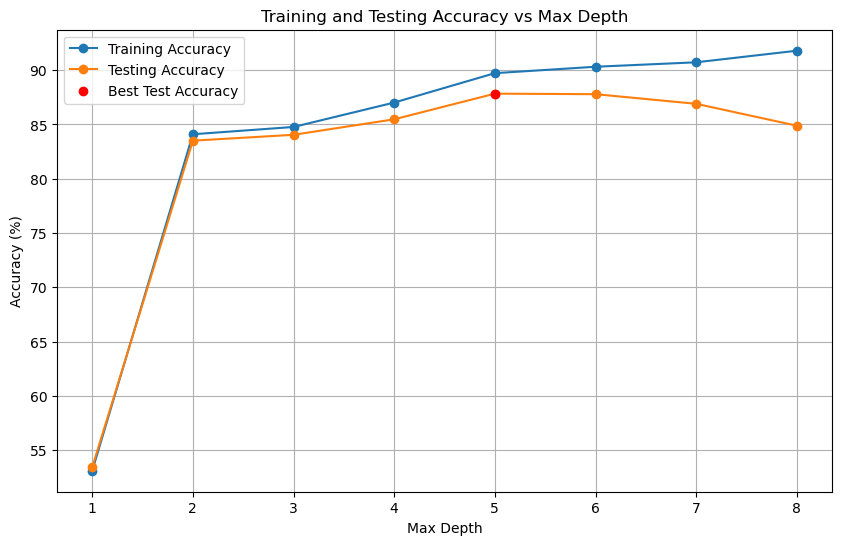

Best max_depth: 5, Best test accuracy: 87.84%


In [231]:
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8]
training_accuracies = []
testing_accuracies = []
for max_depth in max_depth_values:
    tree_gini_pruned = build_tree(X_train, feature_names, calc_gini, max_depth=max_depth)
    
    train_accuracy = calc_accuracy(tree_gini_pruned, X_train, feature_names)
    test_accuracy = calc_accuracy(tree_gini_pruned, X_test, feature_names)
    
    training_accuracies.append(train_accuracy)
    testing_accuracies.append(test_accuracy)

# Find the best result based on test accuracy
best_test_accuracy = max(testing_accuracies)
best_test_index = testing_accuracies.index(best_test_accuracy)
best_max_depth = max_depth_values[best_test_index]

# Plot training and testing accuracies
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, training_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depth_values, testing_accuracies, label='Testing Accuracy', marker='o')
plt.scatter([best_max_depth], [best_test_accuracy], color='red', zorder=8, label='Best Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best max_depth: {best_max_depth}, Best test accuracy: {best_test_accuracy:.2f}%")

## Min Samples Split

(15 points)

Consider the following min_samples_split values: [1, 5, 10, 20, 50]. For each value, construct a tree and prune it according to the min_samples_split value = don't split a node if the number of sample in it is less or equal to the min_samples_split value. Next, calculate the training and testing accuracy.<br>
On a single plot, draw the training and testing accuracy as a function of the min_samples_split. Mark the best result on the graph with red circle. (make sure that the x-axis ticks represent the values of min_samples_split)

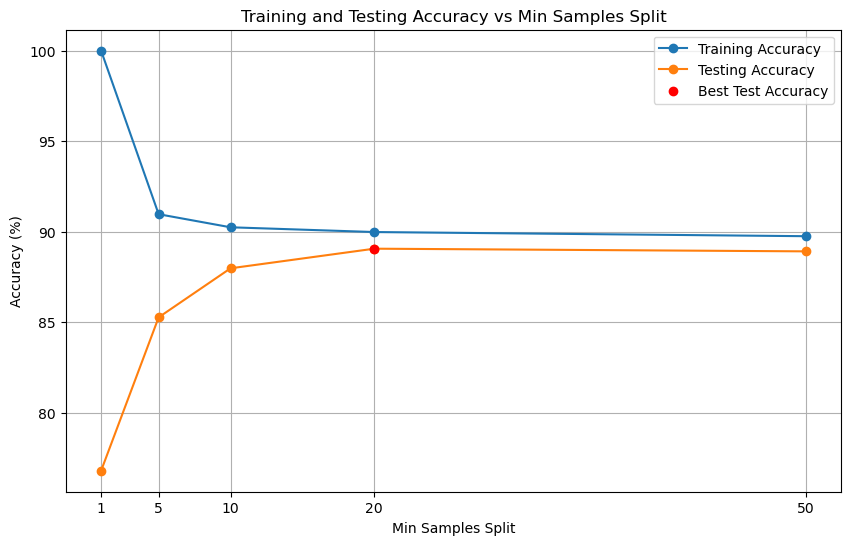

Best min_samples_split: 20, Best test accuracy: 89.07%


In [232]:
min_samples_split_values = [1, 5, 10, 20, 50] #Min Samples Split = 1 will overfit

training_accuracies = []
testing_accuracies = []

# Construct and prune trees for each min_samples_split value
for min_samples_split in min_samples_split_values:
    tree_gini_pruned = build_tree(X_train, feature_names, calc_gini, min_samples_split=min_samples_split)
    
    train_accuracy = calc_accuracy(tree_gini_pruned, X_train, feature_names)
    test_accuracy = calc_accuracy(tree_gini_pruned, X_test, feature_names)
    
    training_accuracies.append(train_accuracy)
    testing_accuracies.append(test_accuracy)

# Find the best result based on test accuracy
best_test_accuracy = max(testing_accuracies)
best_test_index = testing_accuracies.index(best_test_accuracy)
best_min_samples_split = min_samples_split_values[best_test_index]

# Plot training and testing accuracies
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, training_accuracies, label='Training Accuracy', marker='o')
plt.plot(min_samples_split_values, testing_accuracies, label='Testing Accuracy', marker='o')
plt.scatter([best_min_samples_split], [best_test_accuracy], color='red', zorder=5, label='Best Test Accuracy')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy vs Min Samples Split')
plt.xticks(min_samples_split_values)  # Ensure x-axis ticks represent the values of min_samples_split
plt.legend()
plt.grid(True)
plt.show()

print(f"Best min_samples_split: {best_min_samples_split}, Best test accuracy: {best_test_accuracy:.2f}%")

Build the best 2 trees:
1. tree_max_depth - the best tree according to max_depth pruning
1. tree_min_samples_split - the best tree according to min_samples_split pruning

In [233]:
# Build the best tree according to max_depth pruning
tree_max_depth = build_tree(X_train, feature_names, calc_gini, max_depth=best_max_depth)
print_tree(tree_max_depth, feature_names)


Feature: ring-number (Values: n, o, t)
  If ring-number == n:
  Feature: cap-shape (Values: f, k, x)
    If cap-shape == f:
    Feature: gill-attachment (Values: a, f)
      If gill-attachment == a:
      Predict: p
      If gill-attachment == f:
      Feature: cap-color (Values: c, e, n)
        If cap-color == c:
        Predict: e
        If cap-color == e:
        Predict: p
        If cap-color == n:
        Predict: p
    If cap-shape == k:
    Feature: cap-color (Values: c, e, n)
      If cap-color == c:
      Predict: p
      If cap-color == e:
      Feature: gill-attachment (Values: a, f)
        If gill-attachment == a:
        Feature: gill-color (Values: w, y)
          If gill-color == w:
          Predict: e
          If gill-color == y:
          Predict: p
        If gill-attachment == f:
        Predict: p
      If cap-color == n:
      Predict: p
    If cap-shape == x:
    Predict: p
  If ring-number == o:
  Feature: spore-print-color (Values: b, h, k, n, o, u, w, y)


In [234]:
# Build the best tree according to min_samples_split pruning
tree_min_samples_split = build_tree(X_train, feature_names, calc_gini, min_samples_split=best_min_samples_split)
print_tree(tree_min_samples_split, feature_names)


Feature: ring-number (Values: n, o, t)
  If ring-number == n:
  Feature: cap-shape (Values: f, k, x)
    If cap-shape == f:
    Predict: p
    If cap-shape == k:
    Predict: p
    If cap-shape == x:
    Predict: p
  If ring-number == o:
  Feature: spore-print-color (Values: b, h, k, n, o, u, w, y)
    If spore-print-color == b:
    Feature: cap-shape (Values: b, f, k, x)
      If cap-shape == b:
      Predict: e
      If cap-shape == f:
      Predict: e
      If cap-shape == k:
      Predict: e
      If cap-shape == x:
      Predict: e
    If spore-print-color == h:
    Feature: ring-type (Values: f, l, p)
      If ring-type == f:
      Feature: gill-color (Values: h, p, u, w)
        If gill-color == h:
        Predict: e
        If gill-color == p:
        Predict: e
        If gill-color == u:
        Predict: e
        If gill-color == w:
        Predict: e
      If ring-type == l:
      Feature: stalk-color-above-ring (Values: b, n, p)
        If stalk-color-above-ring == b:
    

## Number of Nodes

(5 points)

Complete the function counts_nodes and print the number of nodes in each tree and print the number of nodes of the two trees above

In [235]:
def count_nodes(node):
    """
    Count the number of nodes in a given tree.

    Input:
    - node: a node in the decision tree.

    Output: the number of nodes in the tree.
    """
    if node is None:
        return 0
    
    count = 1  # Count the current node
    for child in node.children.values():
        count += count_nodes(child)  # Recursively count the child nodes
    
    return count

# Example usage
num_nodes = count_nodes(tree_max_depth)
print(f"Number of nodes in the tree: {num_nodes}")


Number of nodes in the tree: 370


## Print the tree

Complete the function `print_tree`. Your tree should be visualized clearly. You can use the following example as a reference:
```
[ROOT, feature=X0],
  [X0=a, feature=X2]
    [X2=c, leaf]: [{1.0: 10}]
    [X2=d, leaf]: [{0.0: 10}]
  [X0=y, feature=X5], 
    [X5=a, leaf]: [{1.0: 5}]
    [X5=s, leaf]: [{0.0: 10}]
  [X0=e, leaf]: [{0.0: 25, 1.0: 50}]
```
In each brackets:
* The first argument is the parent feature with the value that led to current node
* The second argument is the selected feature of the current node
* If the current node is a leaf, you need to print also the labels and their counts

(5 points)

In [236]:
def calculate_label_counts(data):
    labels, label_counts = np.unique(data[:, -1], return_counts=True)
    return dict(zip(labels, label_counts))

def print_tree(node, depth=0, parent_feature='ROOT', feature_val='ROOT', data=None):
    """
    Prints the tree according to the example provided

    Input:
    - node: a node in the decision tree
    - depth: the depth of the current node (default is 0)
    - parent_feature: the feature of the parent node (default is 'ROOT')
    - feature_val: the value of the parent's feature that led to this node (default is 'ROOT')
    - data: the data reaching the current node (assumed to be always provided)

    This function has no return value
    """
    indent = "  " * depth
    if node.prediction is not None:
        # It's a leaf node
        label_counts = calculate_label_counts(data)
        print(f"{indent}[{parent_feature}={feature_val}, leaf]: {label_counts}")
    else:
        # It's a decision node
        print(f"{indent}[{parent_feature}={feature_val}, feature={node.feature}]")
        for feature_value, child_node in node.children.items():
            subset_data = data[data[:, feature_names.index(node.feature)] == feature_value]
            print_tree(child_node, depth + 1, node.feature, feature_value, subset_data)

# Example usage:
# Assuming tree_root is your trained decision tree root node and X_train is your training data
print_tree(tree_root, data=X_train)


[ROOT=ROOT, feature=ring-number]
  [ring-number=n, feature=cap-shape]
    [cap-shape=f, feature=gill-attachment]
      [gill-attachment=a, leaf]: {'p': 5}
      [gill-attachment=f, feature=cap-color]
        [cap-color=c, leaf]: {'e': 1}
        [cap-color=e, leaf]: {'p': 2}
        [cap-color=n, leaf]: {'p': 1}
    [cap-shape=k, feature=cap-color]
      [cap-color=c, leaf]: {'p': 4}
      [cap-color=e, feature=gill-attachment]
        [gill-attachment=a, feature=gill-color]
          [gill-color=w, leaf]: {'e': 1}
          [gill-color=y, leaf]: {'p': 1}
        [gill-attachment=f, leaf]: {'p': 2}
      [cap-color=n, leaf]: {'p': 3}
    [cap-shape=x, leaf]: {'p': 7}
  [ring-number=o, feature=spore-print-color]
    [spore-print-color=b, feature=cap-shape]
      [cap-shape=b, leaf]: {'e': 10}
      [cap-shape=f, leaf]: {'e': 8}
      [cap-shape=k, feature=gill-color]
        [gill-color=n, leaf]: {'e': 3}
        [gill-color=o, leaf]: {'p': 1}
        [gill-color=y, leaf]: {'e': 3}
    

print the tree with the best test accuracy and with less than 50 nodes (from the two pruning methods)